**Assignment 1**

Name: Om Sunil Jadhav

Class: BE Computer 'A'

Roll No.: 21CO050

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ds=pd.read_csv("uber.csv")

In [ ]:
ds

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
ds.shape

(200000, 9)

In [ ]:
ds.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

**Data Preprocessing**

In [ ]:
cds=ds

In [ ]:
cds['dropoff_latitude'].fillna(cds['dropoff_latitude'].mean())
cds['dropoff_longitude'].fillna(cds['dropoff_longitude'].mean())

0        -73.999512
1        -73.994710
2        -73.962565
3        -73.965316
4        -73.973082
            ...    
199995   -73.986525
199996   -74.006672
199997   -73.858957
199998   -73.983215
199999   -73.985508
Name: dropoff_longitude, Length: 200000, dtype: float64

In [ ]:
cds.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
cds.shape

(200000, 9)

**Calculating Distance using Harvesian Formula**

In [ ]:
plong=np.radians(cds['pickup_longitude'])
plat=np.radians(cds['pickup_latitude'])
dlong=np.radians(cds['dropoff_longitude'])
dlat=np.radians(cds['dropoff_latitude'])

In [ ]:
d1=(dlat-plat)/2
d2=(dlong-plong)/2

In [ ]:
exp=np.sqrt(d1**2+np.cos(plat)*np.cos(dlat)*d2**2)

In [ ]:
d=2*6356.7*np.arcsin(exp)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
d

0          1.679544
1          2.452074
2          5.025073
3          1.657954
4          4.465405
            ...    
199995     0.111958
199996     1.870842
199997    12.821478
199998     3.531770
199999     5.405623
Length: 200000, dtype: float64

In [ ]:
cds.insert(len(cds.columns),'distance',d)

In [ ]:
cds

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.679544
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.452074
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.025073
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.657954
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.465405
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.111958
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.870842
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.821478
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.531770


In [ ]:
odf=cds

In [ ]:
odf=odf.drop(['key','pickup_datetime'],axis=1)

In [ ]:
odf.shape

(200000, 8)

**Removal of Outliers**

In [ ]:
Q1 = odf['fare_amount'].quantile(0.25)
Q3 = odf['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR
print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit},Upper_limit = {Upper_limit}')

Q1 = 6.0, Q3 = 12.5, IQR = 6.5, Lower_limit = -3.75,Upper_limit = 22.25


In [ ]:
odf=odf[(odf['fare_amount']>=Lower_limit) & (odf['fare_amount']<=Upper_limit)]

In [ ]:
q1 = odf['distance'].quantile(0.25)
q3 = odf['distance'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print(f'Q1 = {q1}, Q3 = {q3}, IQR = {iqr}, Lower_limit = {lower_limit},Upper_limit = {upper_limit}')

Q1 = 1.1598759068310052, Q3 = 3.2751630756908527, IQR = 2.1152871688598474, Lower_limit = -2.0130548464587656,Upper_limit = 6.448093828980624


In [ ]:
odf=odf[(odf['distance']>=lower_limit) & (odf['distance']<=upper_limit)]

**Correlation**

In [ ]:
import seaborn as sns

             fare_amount  distance
fare_amount     1.000000  0.754546
distance        0.754546  1.000000


<Axes: >

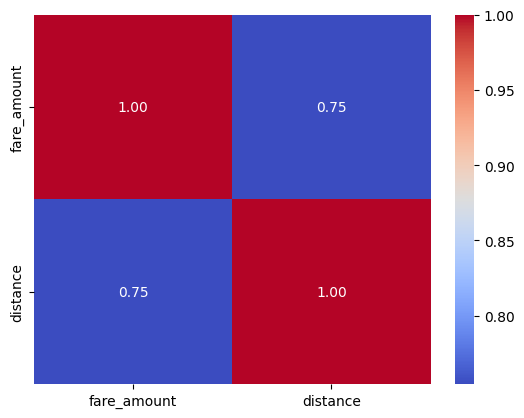

In [ ]:
cm=odf[['fare_amount','distance']]
com=cm.corr()

print(com)
sns.heatmap(com,annot=True,cmap='coolwarm',fmt='.2f')

<Axes: >

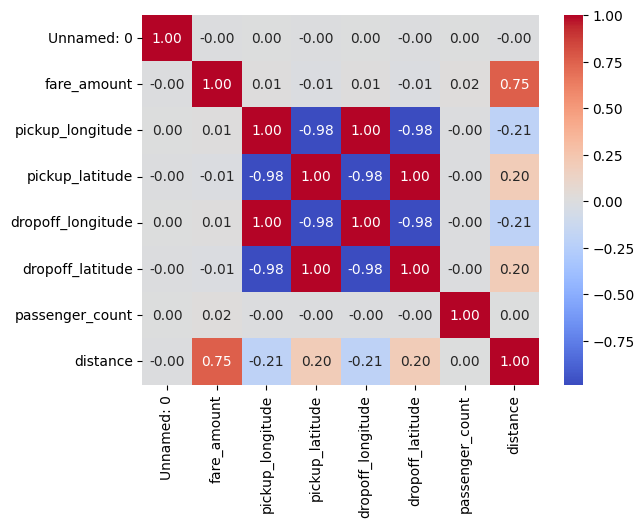

In [ ]:
sns.heatmap(odf.corr(),annot=True,cmap='coolwarm',fmt='.2f')

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
x=odf['distance']
y=odf['fare_amount']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
lr=LinearRegression()
model=lr.fit(xtrain.values.reshape(-1,1),ytrain.values.reshape(-1,1))


In [ ]:
ytrain_pred = lr.predict(xtrain.values.reshape(-1,1))
ytest_pred = lr.predict(xtest.values.reshape(-1,1))


In [ ]:
import matplotlib.pyplot as plt

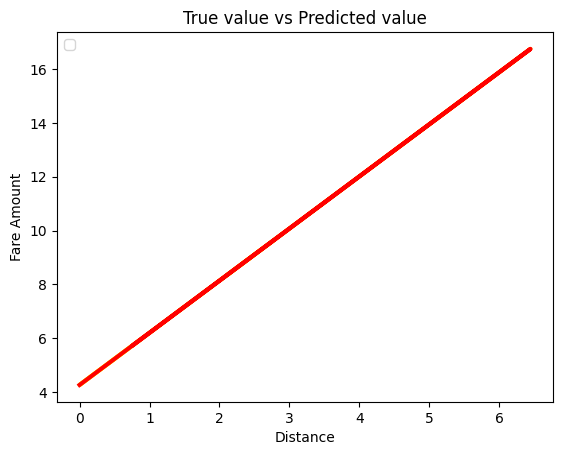

In [ ]:
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot(xtest,ytest_pred,color='yellow',linewidth=3)
plt.plot(xtrain,ytrain_pred,color='red',linewidth=3)
plt.xticks()
plt.yticks()
plt.show()

Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytrain, ytrain_pred)
print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")

Mse = mean_squared_error(ytest, ytest_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(Mse))
print("\n\n\n")

The model performance for training set
--------------------------------------
MSE is 6.0082506549646455


The model performance for testing set
--------------------------------------
MSE is 5.944309308145552






Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytrain, ytrain_pred)
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print("\n")

print("The model performance for testing set")
print("--------------------------------------")
mae = mean_absolute_error(ytest, ytest_pred)
print('MAE is {}'.format(mae))
print("\n\n\n")

The model performance for training set
--------------------------------------
MAE is 1.7481467450914199


The model performance for testing set
--------------------------------------
MAE is 1.747648562941651






R2 Score and Root Mean Squared Error

In [ ]:
from sklearn.metrics import r2_score
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 2.451173322097939
R2 score is 0.5661080250045936




In [ ]:
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 2.438095426382149
R2 score is 0.5767314172650314


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(xtrain.values.reshape(-1, 1), xtrain.values.reshape(-1, 1))
y_pred_rf = rf_model.predict(xtest.values.reshape(-1, 1))


r2_rf = r2_score(ytest, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(ytest, y_pred_rf))
print(f"Random Forest Regression - R2 Score: {r2_rf}")
print(f"Random Forest Regression - RMSE: {rmse_rf}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regression - R2 Score: -2.426291308840926
Random Forest Regression - RMSE: 6.936730549590361
